In [1]:
import glob #to read the files
import json #to work if .json
import numpy as np #to math
import pandas as pd #to save the data
import math #to convertion calculus
from astropy.time import Time #to time converting
from astropy import units #time correction
from astropy.coordinates import SkyCoord #time correction
from scipy import interpolate #to interpolate the wavelength and flux
from tabulate import tabulate #to export in table format
from scipy.interpolate import interp1d
#import scipy.optimize as opt
from scipy import optimize
from scipy import signal
import os.path
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from scipy import stats
import os.path 
import sncosmo

In [2]:
save_path = '/home/joao/Documentos/templates'

In [3]:
kernel = 10.0 * RBF(length_scale=10.0, length_scale_bounds=(5, 15)) + WhiteKernel(noise_level=1e-5, noise_level_bounds=(1e-10, 1e+1))

In [4]:
csp = sncosmo.get_magsystem('csp')
ab = sncosmo.get_magsystem('ab')
vega = sncosmo.get_magsystem('vega')

In [5]:
%run ./functions.ipynb

In [6]:
hist = []
t0_values = []

In [7]:
#file = open("names.txt")
#lines = file.readlines()
#file.close()

In [8]:
#training_set = []

In [9]:
#for line in lines:
#    if line.startswith('#'): continue
#    co=line.rstrip().replace('INDEF','Nan').split()

#    training_set.append(co[0])

In [10]:
sn_names=glob.glob("*.json")

In [11]:
len(sn_names)

378

In [12]:
maxvalues = []

In [13]:
#sn_names = ["SN2011fe.json"]

In [14]:
list_data = []
lightc = []

In [15]:
for j in range(0,len(sn_names)):  
    
    name = sn_names[j]

    print(name)
    
    with open(name, "r") as read_file:
        data = json.load(read_file)

    url = name
    if url.endswith('.json'):
        url = url[:-5]

    
    redshift = redshift_value(data[url])
    
    if redshift is not None:

        t0 = max_time(data[url])

        mag = []
        time = []
        system = []

        for i in range(0,len(data[url]["photometry"])):

            if "band" in data[url]["photometry"][i]:

                if data[url]["photometry"][i]["band"] == "V":

                    if "system" in data[url]["photometry"][i]:
                        
                        system.append(data[url]["photometry"][i]["system"])

                        mag.append(float(data[url]["photometry"][i]["magnitude"]))
                        time.append(float(data[url]["photometry"][i]["time"]))
                    
                    else:
                        
                        system.append("w")

                        mag.append(float(data[url]["photometry"][i]["magnitude"]))
                        time.append(float(data[url]["photometry"][i]["time"]))
        
        
        if len(time) > 3:
    
            maxvalues.append(min(mag))
            
            ntime = []
            nmag = []
            for i in range(0,len(mag)):

                if np.abs(time[i]- min(time)) < 100:
                        
                    if system[i] == "CSP":
                        
                        
                        nmag.append(csp.band_mag_to_flux(mag[i], 'cspv9844')*(1+redshift)**3)
                        ntime.append([time[i]])
                        
                    if system[i] == "AB":
                        #print("ab")
                        
                        nmag.append(ab.band_mag_to_flux(mag[i], 'cspv9844')*(1+redshift)**3)
                        ntime.append([time[i]])
                        
                    if system[i] == "Vega":
                        
                        #print("vega")
                        nmag.append(vega.band_mag_to_flux(mag[i], 'cspv9844')*(1+redshift)**3)
                        ntime.append([time[i]])   
                        
                    if system[i] == "w":
                        
                        #print("w")
                        nmag.append(vega.band_mag_to_flux(mag[i], 'cspv9844')*(1+redshift)**3)
                        ntime.append([time[i]])                     
                    
                  
                    #print(np.abs(time[i][0] - min(time[i])))
            
            #maxvalues.append(max(nmag))
                    
                
            if len(nmag) > 3:   
                
                gp = GaussianProcessRegressor(kernel=kernel, alpha=0.0).fit(ntime, nmag)

                X_ = np.linspace(min(ntime)[0], max(ntime)[0], 1000)

                y_mean, y_cov = gp.predict(X_[:, np.newaxis], return_cov=True)

                y_mean = list(y_mean)

                idx = y_mean.index(max(y_mean))

                if idx > 2: 
                    #if max(y_mean) < 0.5:
                    hist.append([X_[idx] - t0,sn_names[j]])
                    t0_values.append([X_[idx],sn_names[j]])

                    lightc.append([X_, y_mean])                    

                #list_data.append(max(y_mean))
                #list_data.append([X_, y_mean])

SN2006ax.json
0.016725
SN2013bh.json
0.068
SN2001el.json
0.00536
SN2001ie.json
0.030738
SN2007af.json
0.005464
SN2008hu.json
0.05056
SN2000cx.json
0.007929
SN1998dh.json
0.00897
SN1980N.json
0.005871
SN2012fr.json
0.0054
SN2003fd.json
0.060222
SN2002ck.json
0.029864
SN2003ae.json
0.0329
SN2007A.json
0.017653315868428443
SN2007fs.json
0.01719
SN1995ak.json
0.02272
SN2012dn.json
0.010187
SN2005al.json
0.012381930324267376
SN2004bd.json
0.00893
SN2008ar.json
0.026147
SN2006D.json
0.008529
PTF09dlc.json
0.0672
SN2006gj.json
0.02829
SN2013aa.json
0.003999
SN2003M.json
0.02424
SN2008hv.json
0.012526589416171241
SN1998aq.json
0.003699
SN2001iq.json
0.01842
SN2007kk.json
0.041045
SN2000dg.json
0.03849
SN2009dc.json
0.02158
SN2001V.json
0.01502
SN2005cf.json
0.006461
SN1999dk.json
0.01496
SN1990R.json
0.0162
SN2006le.json
0.017432
SN2013ew.json
0.056
SN2008s1.json
0.0221
SN2000E.json
0.00606
SN1998bp.json
0.01043
SN2005ej.json
0.037873
SN2009D.json
0.025007
SN2005hj.json
0.05802511117307718
LSQ

0.007609
SN2012cg.json
0.001458
SN1999da.json
0.01269
SN2014at.json
0.035
SN1997br.json
0.006941
LSQ12gpw.json
0.058
SN2008bf.json
0.024027
SN2003eh.json
None
SN2001ep.json
0.013012
SN2007co.json
0.026962
SN1992A.json
0.00626
SN2005kc.json
0.01512
SN1994M.json
0.02316
SN2006ac.json
0.023106
SN2002cs.json
0.01577
SN2006cf.json
0.041549
SN2000fa.json
0.02127
SN2004dt.json
0.01973
SN2000fo.json
0.02386
SN2002jy.json
0.0196
SN2005be.json
0.035001
SN2003hv.json
0.005601
SN2005eo.json
None
SN2006dv.json
0.03297
SN2010ae.json
0.003662
SN1960F.json
0.00398
SN2007nq.json
0.045049248780426154
SN2005ag.json
0.079402
SN2008ia.json
0.02197002237988821
SN2001bg.json
0.007122
SN2005cg.json
redshift nao encontrado
SN2005ls.json
0.021118
SN1981B.json
0.006031
SN2009ag.json
0.00864
SN1998de.json
0.01647
SN2008fp.json
0.005656012429203772
SN1972E.json
0.001358
SN2007ao.json
0.0247
SN2013bg.json
0.066
SN2008A.json
0.016455
SN1999cw.json
0.01237
SN2009F.json
0.012946957105361312
SN2005hk.json
0.01306
SN199

SN2006hb.json
0.0153328042114802
SN2001fe.json
0.013539
SN2002ar.json
0.03009
SN2002ha.json
0.014046
SN2006gt.json
0.044771
SN2002hw.json
0.017535
SN2002cu.json
0.023323
PTF10vqv.json
redshift nao encontrado
SN2002do.json
0.015881
SN1998dm.json
0.006541
LSQ12ege.json
0.08
SN2005ki.json
0.019207
SN2001ck.json
0.034721
SN2007au.json
0.020584
SN2006N.json
0.014277
SN1993Z.json
0.00452
SN2002cx.json
0.02396
SN2001E.json
0.01926
SN2008Z.json
0.02099
SN2007bc.json
0.02077
SN2008gl.json
0.034017
SN2013hn.json
0.01514
SN2004bv.json
0.01061
SN2001G.json
0.01677
SN1991K.json
0.017
SN2008ec.json
0.016317
SN2003kd.json
0.0302
SN2008dr.json
0.041449
SN2013cs.json
0.009
SN2010jn.json
0.025047
PTF10ops.json
0.06
SN2007bj.json
0.016708
SN2002dj.json
0.009393
SN1954B.json
0.00609
SN2006mr.json


0.00586826659018258
SN1998dx.json
0.054221
SN2009ab.json
0.01117
SN2007ap.json
0.015818
SN2007al.json
0.012122
SN1990M.json
0.00904
SN2002er.json
0.008569
SN1990U.json
0.007935
SN2002hd.json
0.035001
SN2001az.json
0.040701
LSQ12fhs.json
0.033145
SN1999aa.json
0.01444
SN2013gh.json
0.0088


In [16]:
#list_data_temp = []

In [17]:
'''
for i in range(0,len(maxvalues)):
    
    if maxvalues[i]<25:
        
        list_data_temp.append(maxvalues[i])
'''

'\nfor i in range(0,len(maxvalues)):\n    \n    if maxvalues[i]<25:\n        \n        list_data_temp.append(maxvalues[i])\n'

In [18]:
system

['w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'Vega',
 'w',
 'w',
 'w',
 'Vega',
 'w',
 'Vega',
 'w',
 'w',
 'w',
 'Vega',
 'Vega',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'Vega',
 'w',
 'w',
 'w',
 'w',
 'w',
 'Vega',
 'w',
 'w',
 'w',
 'w',
 'w',
 'Vega',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w']

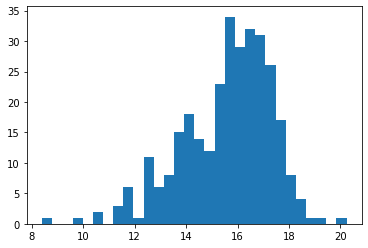

In [19]:
%matplotlib inline
plt.hist(maxvalues, bins=30)
#plt.xlim(0,30)
plt.show()

In [20]:
len(lightc)

235

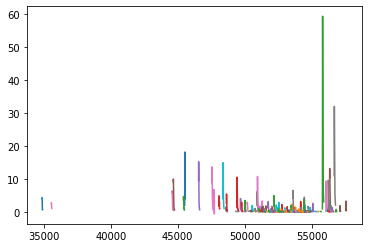

In [21]:
%matplotlib inline
for i in range(0,len(lightc)):
    
    plt.plot(lightc[i][0],lightc[i][1])
    
plt.show()

In [22]:
hist_1 = []
for i in range(0,len(hist)):
    
    if np.abs(hist[i][0]) < 20:
        
        hist_1.append([hist[i][0], hist[i][1]])

In [23]:
hist_val = []

In [24]:
for i in range(0,len(hist_1)):
    
    hist_val.append(hist_1[i][0])

<IPython.core.display.Javascript object>


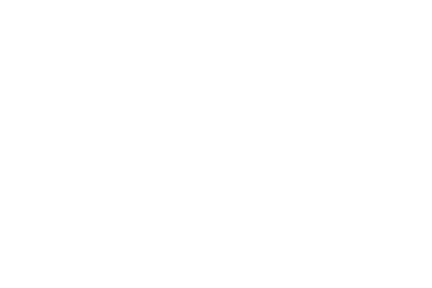

<IPython.core.display.Javascript object>


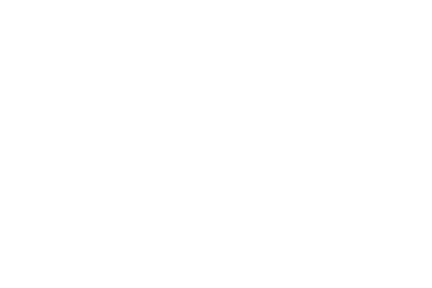

In [25]:
%matplotlib notebook

plt.hist(hist_val, bins=30)
plt.ylabel('Probability')
plt.show()

In [26]:
hist_1

[[3.918585855855781, 'SN2006ax.json'],
 [-0.21521521521208342, 'SN2013bh.json'],
 [2.400870870871586, 'SN2001el.json'],
 [3.1463301701660384, 'SN2007af.json'],
 [1.637537537535536, 'SN2000cx.json'],
 [2.066596596596355, 'SN1998dh.json'],
 [4.243153153147432, 'SN1980N.json'],
 [4.11329329329601, 'SN2012fr.json'],
 [1.4709424124157522, 'SN2002ck.json'],
 [5.125238948952756, 'SN2007A.json'],
 [2.4553153153174208, 'SN2012dn.json'],
 [0.824668308305263, 'SN2005al.json'],
 [2.0004831831829506, 'SN2008ar.json'],
 [0.6537577777780825, 'SN2006D.json'],
 [4.89505555555661, 'SN2013aa.json'],
 [3.7077251351365703, 'SN2008hv.json'],
 [1.7847647647649865, 'SN1998aq.json'],
 [1.0916028828869457, 'SN2007kk.json'],
 [0.9574903603570419, 'SN2009dc.json'],
 [0.7978818418414448, 'SN2001V.json'],
 [2.1347342342342017, 'SN2005cf.json'],
 [-1.5731731731721084, 'SN1999dk.json'],
 [1.1933204604647472, 'SN2006le.json'],
 [4.445165065066249, 'SN2008s1.json'],
 [2.236646646648296, 'SN2000E.json'],
 [3.40588588588

In [27]:
len(hist_1)

230

In [28]:
names = []
zerotime = []

In [29]:
for i in range(0,len(t0_values)):
    
    zerotime.append(t0_values[i][0])
    names.append(t0_values[i][1][:-5])

In [30]:
names

['SN2006ax',
 'SN2013bh',
 'SN2001el',
 'SN2007af',
 'SN2000cx',
 'SN1998dh',
 'SN1980N',
 'SN2012fr',
 'SN2002ck',
 'SN2007A',
 'SN2012dn',
 'SN2005al',
 'SN2008ar',
 'SN2006D',
 'SN2006gj',
 'SN2013aa',
 'SN2008hv',
 'SN1998aq',
 'SN2007kk',
 'SN2009dc',
 'SN2001V',
 'SN2005cf',
 'SN1999dk',
 'SN2006le',
 'SN2008s1',
 'SN2000E',
 'SN1998bp',
 'SN2009D',
 'SN2005hj',
 'SN2003cq',
 'SN2005bo',
 'SN2007N',
 'SN2001br',
 'SN1999ej',
 'SN2008ha',
 'SN2007ai',
 'SN1998bu',
 'SN1997bq',
 'SN2007hj',
 'SN2002cr',
 'SN2005bl',
 'SN2001N',
 'SN2007cq',
 'SN2003ic',
 'SN2002dp',
 'SN2016coj',
 'SN2012hr',
 'SN2009jb',
 'SN1995E',
 'SN2009Y',
 'SN2000dn',
 'SN2007F',
 'SN1995al',
 'SN1990N',
 'SN2006S',
 'SN1994S',
 'SN1999cp',
 'SN2007bm',
 'SN2006sr',
 'SN1997bp',
 'SN2003iv',
 'SN2003it',
 'SN2000dm',
 'SN2003du',
 'SN1994ae',
 'SN1999ee',
 'SN1999by',
 'SN2005df',
 'SN1997dt',
 'SN2002hu',
 'SN1983N',
 'SN2000cp',
 'SN2001fh',
 'SN2003W',
 'SN1986G',
 'SN2015bp',
 'SN1989M',
 'SN1991bg',
 'S

In [31]:
'''
table = []
for l in range(0,len(names)):
    table.append((names[l],zerotime[l]))

name_of_file = "t0_values"

completeName = os.path.join(save_path, name_of_file+".txt")

f = open(completeName, 'w')
f.write(tabulate(table, tablefmt="plain"))
f.close()
'''

'\ntable = []\nfor l in range(0,len(names)):\n    table.append((names[l],zerotime[l]))\n\nname_of_file = "t0_values"\n\ncompleteName = os.path.join(save_path, name_of_file+".txt")\n\nf = open(completeName, \'w\')\nf.write(tabulate(table, tablefmt="plain"))\nf.close()\n'

<IPython.core.display.Javascript object>


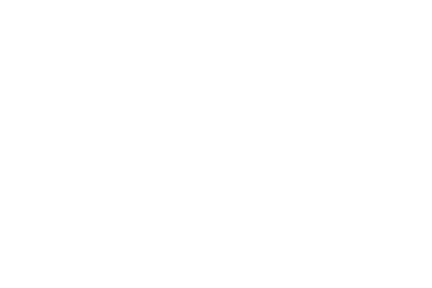

<IPython.core.display.Javascript object>


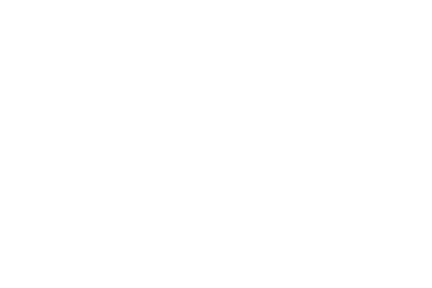

In [32]:
%matplotlib notebook
plt.plot(time,mag,'.')
plt.show()

In [33]:

table = []
for l in range(0,len(names)):
    table.append((names[l],maxvalues[l]))

name_of_file = "max_valuesV"

completeName = os.path.join(save_path, name_of_file+".txt")

f = open(completeName, 'w')
f.write(tabulate(table, tablefmt="plain"))
f.close()


In [34]:
maxvalues

[15.205,
 18.44,
 12.686,
 16.698,
 13.206,
 13.23,
 14.005,
 12.4,
 11.91,
 15.6,
 17.705,
 15.726,
 15.2161,
 16.01,
 14.201,
 15.076,
 15.661,
 16.3505,
 14.207,
 17.623,
 11.616,
 14.822,
 12.458,
 17.5533,
 17.375,
 15.2184,
 14.0,
 13.501,
 14.867,
 16.114,
 16.149,
 13.83,
 15.298,
 15.9047,
 17.73,
 16.629,
 17.354,
 17.11,
 14.507,
 18.145,
 14.485,
 15.551,
 16.714,
 17.193,
 16.339,
 16.835,
 15.617,
 17.635,
 17.791,
 16.62,
 11.76,
 13.38,
 14.675,
 15.6515,
 14.2,
 17.883,
 16.348,
 17.605,
 18.586,
 16.097,
 17.764,
 14.574,
 13.141,
 13.75,
 15.942,
 15.0,
 14.141,
 16.738,
 15.942,
 12.7,
 12.73,
 16.804,
 14.84,
 14.013,
 14.55,
 14.149,
 16.392,
 13.875,
 17.414,
 16.507,
 15.668,
 13.566,
 12.0,
 16.316,
 13.8,
 14.597,
 16.264,
 13.135,
 12.416,
 16.619,
 15.369,
 16.8,
 10.73,
 17.911,
 16.695,
 15.867,
 11.44,
 15.739,
 17.254,
 13.784,
 12.4,
 17.04,
 13.96,
 13.609,
 18.242,
 14.136,
 15.093,
 15.368,
 16.278,
 17.884,
 15.849,
 14.662,
 15.698,
 16.634,
 16.57

In [35]:
mag

[16.21,
 15.74,
 15.48,
 15.731,
 15.26,
 15.35,
 15.36,
 15.05,
 15.301,
 15.13,
 14.93,
 14.82,
 15.033,
 14.65,
 14.715,
 14.673,
 14.529,
 14.32,
 14.24,
 14.18,
 14.231,
 14.295,
 14.26,
 14.18,
 14.0,
 14.01,
 14.219,
 14.0,
 14.359,
 14.23,
 14.249,
 14.09,
 14.235,
 14.15,
 14.256,
 14.2,
 14.14,
 14.383,
 14.232,
 14.16,
 14.301,
 14.12,
 14.41,
 14.3,
 14.346,
 14.25,
 14.439,
 14.26,
 14.39,
 14.575,
 14.48,
 14.633,
 14.49,
 14.655,
 14.62,
 14.21,
 14.757,
 14.66,
 14.793,
 14.69,
 14.878,
 14.5,
 15.006,
 14.85,
 14.87,
 14.97,
 14.87,
 15.025,
 14.96,
 15.097,
 14.98,
 15.06,
 15.01,
 15.22,
 15.36,
 15.41,
 15.44,
 15.527,
 15.65,
 15.7,
 15.745,
 15.72,
 15.78,
 15.831,
 15.983,
 15.79,
 15.93,
 15.89,
 16.12,
 16.198,
 16.384,
 16.19,
 16.394,
 16.32,
 16.23,
 16.596,
 16.42,
 16.43,
 16.51,
 16.779,
 16.791,
 16.598,
 16.607,
 16.735,
 16.825,
 17.096,
 16.887,
 17.071,
 17.03,
 17.026,
 17.107,
 17.474,
 17.667,
 17.755]